In [1]:
from logging import Formatter
from logging import getLogger
from logging import INFO
from logging import StreamHandler

logger = getLogger(__name__)
logger.handlers.clear()
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter('%(name)s - %(asctime)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

We have exactly one file so let's load it up

In [2]:
from pandas import read_csv

df = read_csv(filepath_or_buffer='../input/chess/games.csv')
logger.info(msg=df.shape)
logger.info(msg='\n{}'.format(df.dtypes))
logger.info(msg='rated: {}'.format(df['rated'].value_counts().to_dict()))
logger.info(msg='unique IDs/rows: {}/{}'.format(df['id'].nunique(), len(df)))

__main__ - 2023-06-18 19:34:26,684 - INFO - (20058, 16)
__main__ - 2023-06-18 19:34:26,687 - INFO - 
id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object
__main__ - 2023-06-18 19:34:26,696 - INFO - rated: {True: 16155, False: 3903}
__main__ - 2023-06-18 19:34:26,704 - INFO - unique IDs/rows: 19113/20058


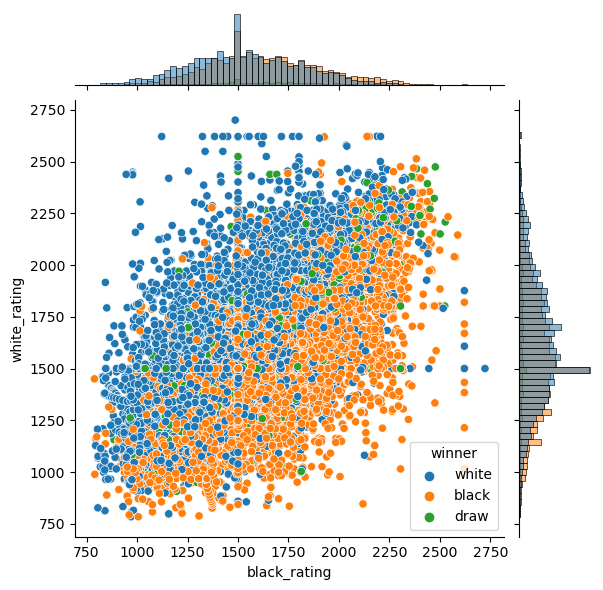

In [3]:
%matplotlib inline
from seaborn import histplot
from seaborn import JointGrid
from seaborn import scatterplot
grid = JointGrid(data=df, hue='winner', x='black_rating', y='white_rating', )
grid.plot(scatterplot, histplot)

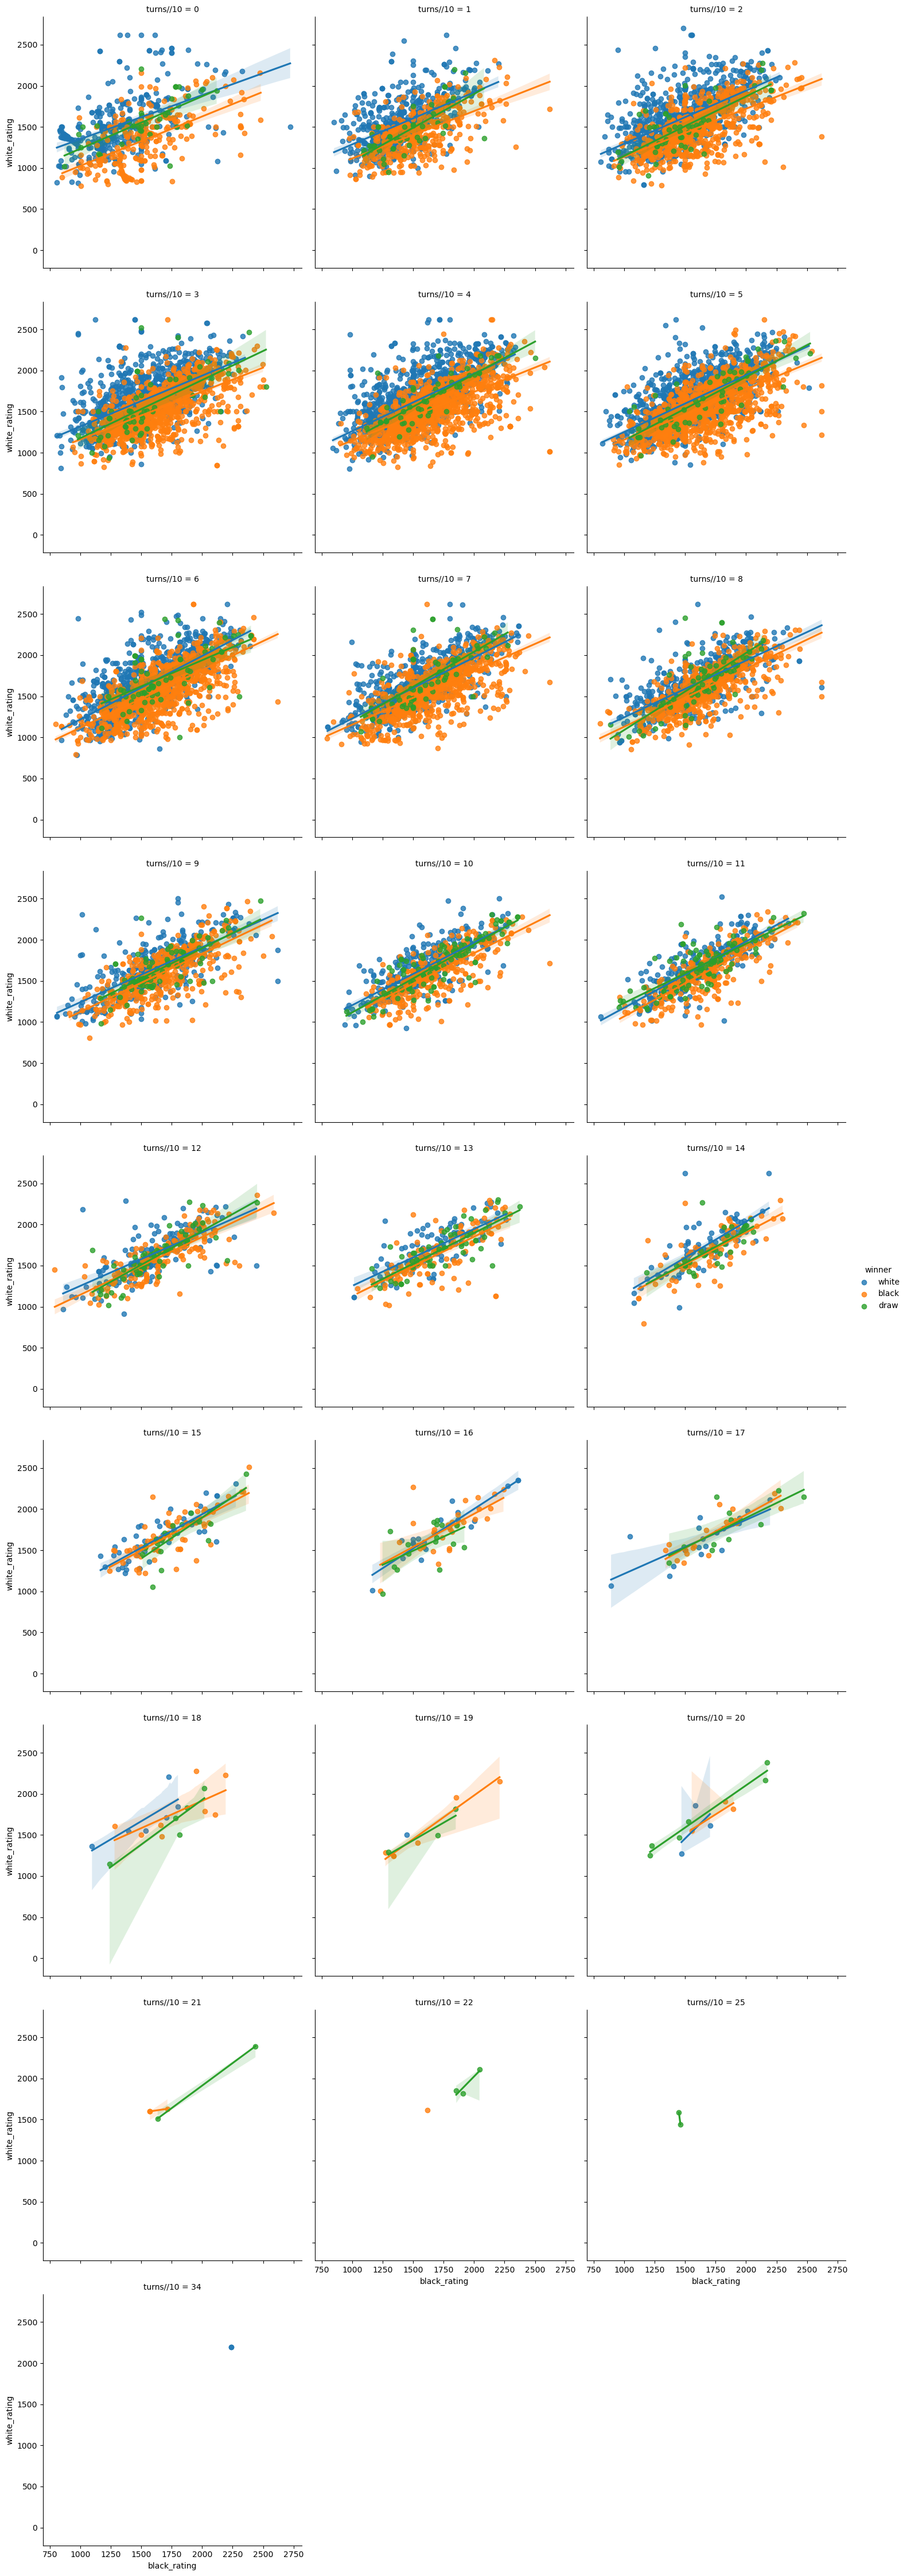

In [4]:
from seaborn import lmplot
df['turns//10'] = df['turns'].apply(func=lambda x: int(x) // 10)
lmplot(data=df, x='black_rating', y='white_rating', col='turns//10', col_wrap=3, hue='winner', )

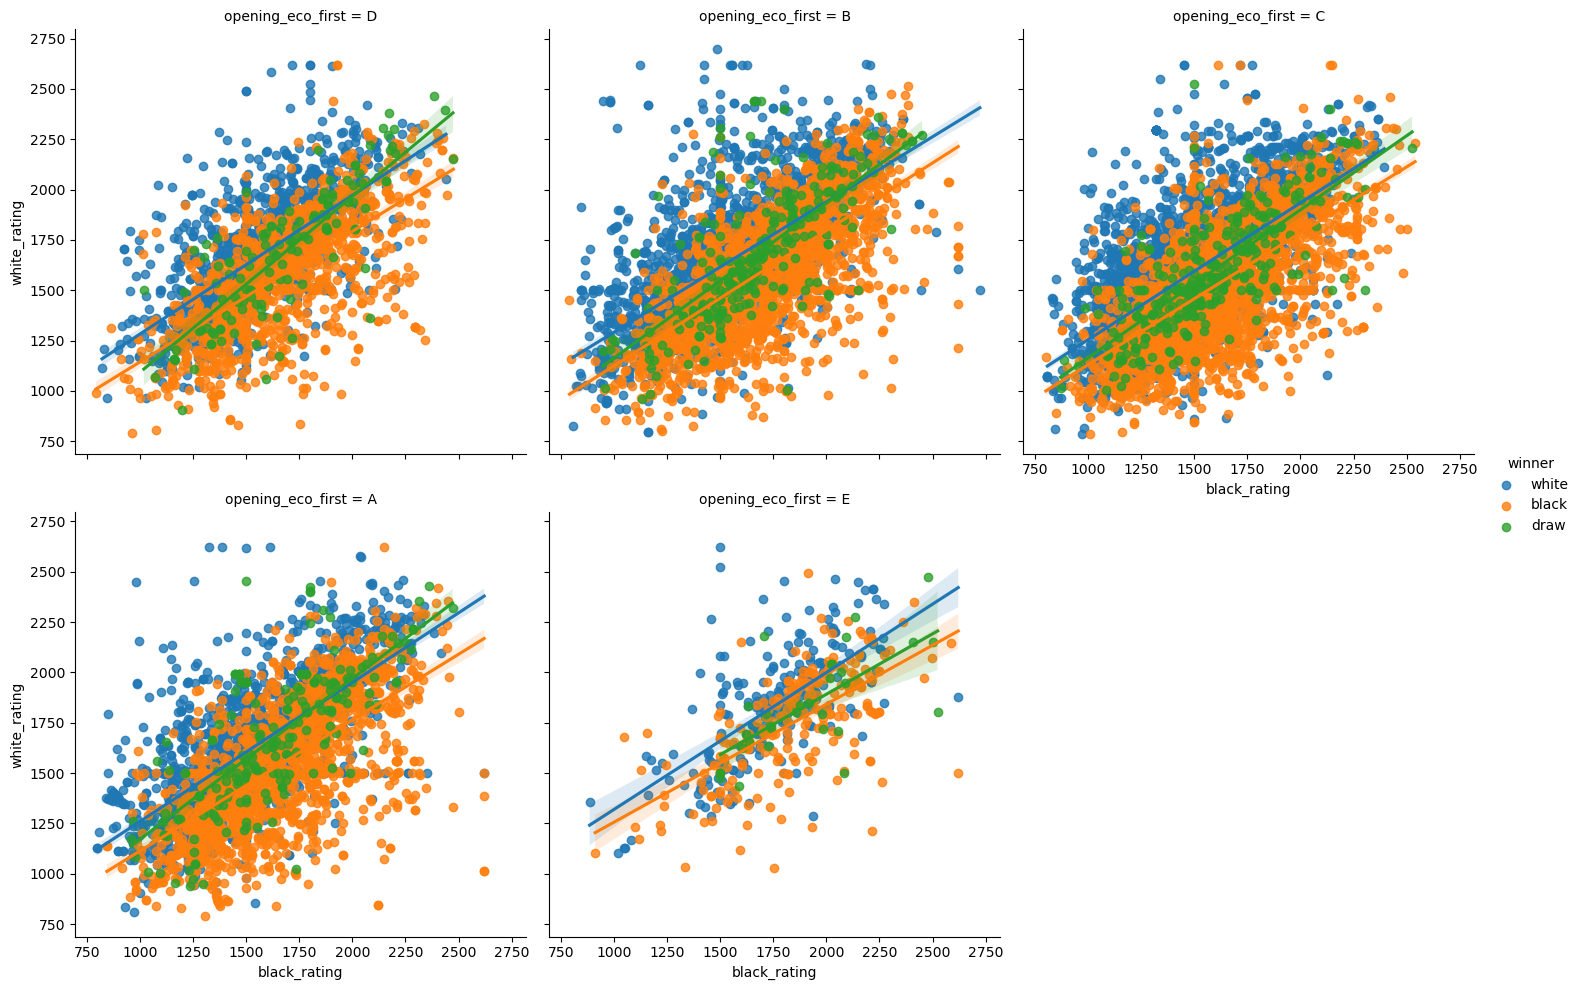

In [5]:
df['opening_eco_first'] = df['opening_eco'].apply(func=lambda x: str(x)[0])
lmplot(data=df, x='black_rating', y='white_rating', col='opening_eco_first', col_wrap=3, hue='winner', )